AttributeError: module 'matplotlib' has no attribute 'animation'

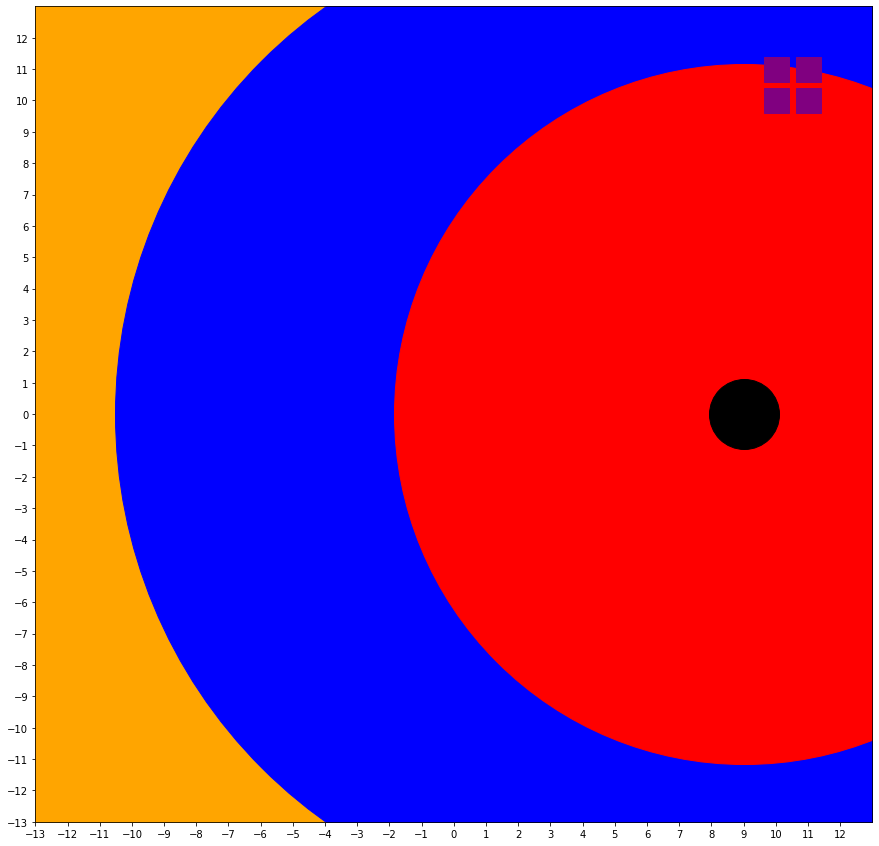

In [2]:
# Code for animation 

import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# Initialising the points
sun = [0, 0]
earth = [5, 0]
moon = [6, 0]
mars = [9, 0]
space_station = [(10,10), (10,11), (11,11), (11,10)]
starship = [9, 0]

# Initialising the figure
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
ax.set_xlim(-13, 13)
ax.set_ylim(-13, 13)
ax.set_xticks(np.arange(-13, 13, 1))
ax.set_yticks(np.arange(-13, 13, 1))

# Setting the initial position
ax.plot(sun[0], sun[1], marker='o', color='orange', markersize=6000)
ax.plot(earth[0], earth[1], marker='o', color='blue', markersize=1000)
ax.plot(moon[0], moon[1], marker='o', color='goldenrod', markersize=150)
ax.plot(mars[0], mars[1], marker='o', color='red', markersize=700)

ax.plot(space_station[0][0], space_station[0][1], marker='s', color='purple', markersize=25)
ax.plot(space_station[1][0], space_station[1][1], marker='s', color='purple', markersize=25)
ax.plot(space_station[2][0], space_station[2][1], marker='s', color='purple', markersize=25)
ax.plot(space_station[3][0], space_station[3][1], marker='s', color='purple', markersize=25)

ax.plot(starship[0], starship[1], marker='o', color='black', markersize=70)

# Setting the animation
frames = 20
pos_earth = np.zeros((frames,2))
pos_moon = np.zeros((frames,2))
pos_mars = np.zeros((frames,2))
pos_starship = np.zeros((frames,2))

for i in range(frames):
    # Earth's movement
    theta_earth = 2*np.pi/frames*i
    pos_earth[i,0] = 5*np.cos(theta_earth)
    pos_earth[i,1] = 5*np.sin(theta_earth)
    
    # Moon's movement
    theta_moon = 8*np.pi/frames*i
    pos_moon[i,0] = 6*np.cos(theta_moon) + pos_earth[i,0]
    pos_moon[i,1] = 6*np.sin(theta_moon) + pos_earth[i,1]
    
    # Mars's movement
    theta_mars = 2*np.pi/frames*i
    pos_mars[i,0] = 9*np.cos(theta_mars)
    pos_mars[i,1] = 9*np.sin(theta_mars)
    
    # Spaceship's movement
    if i < frames/2:
        pos_starship[i,0] = 9*np.cos(theta_mars)
        pos_starship[i,1] = 9*np.sin(theta_mars)
    else:
        pos_starship[i,0] = 10
        pos_starship[i,1] = 10


# Creating the animation
positions = (pos_earth, pos_moon, pos_mars, pos_starship)
colors = ('blue', 'goldenrod', 'red', 'black')
sizes = (1000, 150, 700, 70)

def update(i):
    for j in range(4):
        ax.plot(positions[j][i,0], positions[j][i,1], marker='o', color=colors[j], markersize=sizes[j])

ani = matplotlib.animation.FuncAnimation(fig, update, frames=frames, interval=50)
plt.show()

In [ ]:
from segamath import *

sun = point([0,0], size = 6000, color = 'orange')
earth = point([5,0], size = 1000, color = 'blue') 
moon =point([6, 0], size = 150, color = 'goldenrod')
mars=point([9, 0], size = 700, color = 'red')
station = polygon([(10,10), (11,10), (11,11), (10, 11)], color = 'purple')
spaceship = point([(9,0)], size=70, color = 'black')

# set up a list of frames to be animated 
frames = [[sun+earth+moon+mars+station+spaceship]] # first frame

# animate earth
for i in range(360):
    x = 5*cos(i)
    y = 5*sin(i)
    frames.append(sun+point([x,y], size=1000, color = 'blue')+moon+mars+station+spaceship)

# animate moon
for i in range(360):
    x = 6*cos(4*i)
    y = 6*sin(4*i)
    frames.append(sun+earth+point([x,y], size=150, color = 'goldenrod')+mars+station+spaceship)

# animate mars
for i in range(360):
    x = 9*cos(i)
    y = 9*sin(i)
    frames.append(sun+earth+moon+point([x,y], size=700, color = 'red')+station+spaceship)

# animate spaceship
for i in range(180):
    frames.append(sun+earth+moon+mars+station+point([9*cos(i), 9*sin(i)], size=70, color = 'black'))

for i in range(180):
    frames.append(sun+earth+moon+mars+station+point([10+1*cos(i), 10+1*sin(i)], size=70, color = 'black'))

# animate entire figure
frames.append(sun+earth+moon+mars+station+spaceship)

# generate animation
graphics_array(frames, xmin=-13, xmax=13, ymin=-13, ymax=13, figsize=15, ticks=(1,1))